## Entrenar un red neuronal para que aprenda a reconocer
## el teorema de pitagora a partir de 2 catetos


In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt



## generacion de datos 

In [19]:
def generar_datos(num_ejemplos):
    a = np.random.uniform(0, 10, num_ejemplos)
    b = np.random.uniform(0, 10, num_ejemplos)
    c = np.sqrt(a**2 + b**2)
    return np.column_stack((a, b)), c



#### Generrar los Datos de Entrenamiento

In [20]:
num_ejemplos = 10000
train_data, train_labels = generar_datos(num_ejemplos)
test_data, test_labels = generar_datos(int(num_ejemplos * 0.2))

### construccion del Modelo

In [21]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) # El valor de la Hipotenusa 
])


### Compilacion del Modelo

In [22]:
model.compile(optimizer='adam', loss='mse') #mean _squarter_error

### Entrenamos el modelo Red Neuronal

In [23]:
historial= model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9904 - val_loss: 0.0081
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.0040 - val_loss: 0.0011
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8992e-04 - val_loss: 1.2323e-04
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 1.0000e-04 - val_loss: 7.6576e-05
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 6.7080e-05 - val_loss: 5.3542e-05
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 5.0154e-05 - val_loss: 4.5266e-05
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 4.4452e-05 - val_loss: 3.6340e-05
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 3.9713e-05 - val_loss: 3.0744e-05
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 3.2867e-05 - val_loss: 3.6098e-05
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 3.1063e-05 - val_loss: 2.6968e-05
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - lo

## graficar historia de entrenamiento

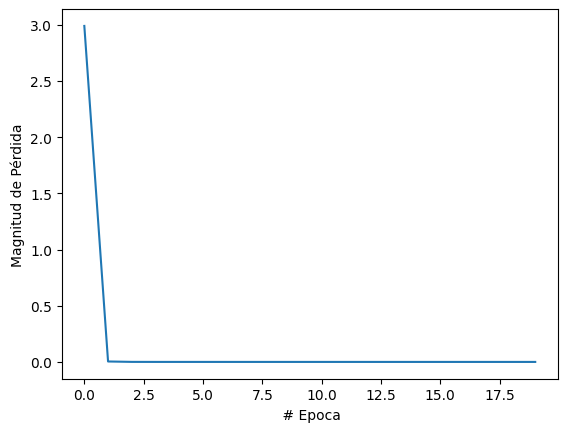

In [24]:
plt.xlabel(' # Epoca')
plt.ylabel('Magnitud de Pérdida')
plt.plot(historial.history['loss'])


### Evaluacion del Modelo 

In [25]:
test_loss = model.evaluate(test_data, test_labels)
print(f'Perdida en el conjunto de prueba {test_loss}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 3.5145e-05
Perdida en el conjunto de prueba 3.514543641358614e-05


### Prediccion de teorema de pitagoras con otros Datos 

In [26]:
nuevos_datos = np.array([[3, 4],[6, 8], [25, 60]])
hipotenusa_pred = model.predict(nuevos_datos)
print(f'Hipotenusa predicida {hipotenusa_pred}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Hipotenusa predicida [[ 5.0060115]
 [10.0063095]
 [65.08966  ]]
